# Regression Exercise 1: Linear Regression

In this exercise, we will apply our linear regression skills on a few artificial datasets.

It is recommended to use [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for this question.

## Part 1: Adding Noise

**Questions:**
1. Sample 1000 data points (x) from a uniform distribution over $(1,10)$. (Hint: use np.random.uniform.)
2. Sample noise $n$ from $\mathcal{N}(0, 100)$ ($\sigma^2 = 100$) for each data point. Define $y = 5x + 2$ and plot $y’=y + n$ with plt.scatter(..., alpha=0.2). (Hint: Use np.random.normal, and be careful not to confuse variance and standard deviation.)
3. Perform linear regression to generate $\hat{y}$, an approximation of $y$, using $x$ and $y'$. Plot $\hat{y}$ on top of the plot from question 2.
4. What is the equation for the regression line (to two decimal places)? (See .coef_ and .intercept_ attributes in LinearRegression.) The result should be close to, but not equal to, the line from question 1.
5. Compute the $R^2$ score using LinearRegression.score().
6. If we instead sampled noise $n$ from $\mathcal{N}(0, 36)$ in question 2, what $R^2$ score would we get? Why?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

QUESTION 1 y 2  
Getting random points, defining y_true, y (includes noise) and plotting

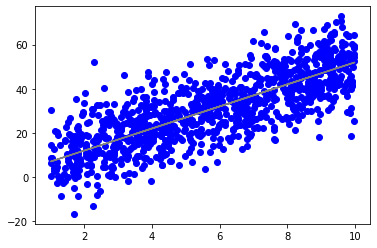

In [2]:
x = np.random.uniform(1,10,1000)
noise = np.random.normal(0,10,1000)
y_true = 5*x + 2
y = y_true + noise

plt.scatter(x,y, color='blue')
plt.plot(x, y_true, color='gray')
plt.show()


Question 3  
Fitting the Linear Regression Model with Sklearn, predicting and plotting

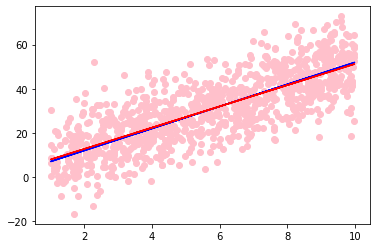

In [3]:
X = x[:, None]
reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X)


plt.scatter(x,y, color='pink')
plt.plot(x, y_true, color='blue')
plt.plot(x, y_pred, color='red')
plt.show()


Question 4  
Printing the equation according to the model.

In [4]:
print(f"The equation is y = {round(reg.coef_[0],2)}*x + {round(reg.intercept_,2)}")

The equation is y = 4.81*x + 3.12


Question 5  
Calculating R2

In [5]:
print(f"R2 is = to {round(reg.score(X,y),3)}")

R2 is = to 0.6


Question 6  
New model with different Noise.  
Printing R2 which as expected turns out to be much better.

In [6]:
noise2 = np.random.normal(0,6,1000)

y2 = y_true + noise2

reg2 = LinearRegression().fit(X,y2)
y_pred2 = reg.predict(X)
print(f"R2 is = to {round(reg2.score(X,y2),2)}")

R2 is = to 0.83


R2 is much better and that is explained by the fact that the noise has less variance.

# Part 2: Anomalous Data

**Questions:**
1. Load the data in *lin_reg.csv* to a pandas data frame, and perform a linear regression on the x and y columns. Print the intercept, coefficient, and $R^2$ values.
8. Plot the residuals for the regression performed on the all rows of the data frame. What do you see?
9. Plot a scatter plot of the x and y values, with the regression line on top. What do you see?
10. How would you improve the linear regression? What would be better intercept and coefficient values? Plot another scatter plot of the x and y values with this improved linear regression line on top.

Question 1

Loading dataframe

In [7]:
df = pd.read_csv('lin_reg.csv')
df.head()

,x,y
0,-3.441813,23.270398
1,-2.720720,17.759720
2,3.076827,1.531452
3,3.039571,-1.212449
4,2.206432,-0.451499


Building the regression model

In [8]:
x = df['x']
y = df['y']
X = x[:,None]
reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X)
print(f" The intercept is {round(reg.intercept_,2)}")
print(f" The coeficient is {round(reg.coef_[0],2)}")
print(f" R2 is {reg.score(X,y)}")

 The intercept is 23.79
 The coeficient is 1.63
 R2 is 0.0016777473401009546


Question 2
Plotting residuals

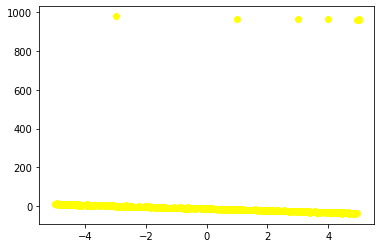

In [9]:
residuals = y - y_pred

plt.scatter(x, residuals, color='yellow')
plt.show()


We see that the residuals are close to 0, but there are a few points with very high value 

Question 3

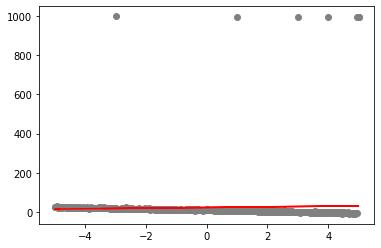

In [10]:
plt.scatter(x, y, color='gray')
plt.plot(x, y_pred, color='red')

plt.show()


Question 4  
In order to improve the regresion i would eliminate the outliers.  
We'll do that and fit the model again to do a new prediction.

In [11]:
df['y'].describe()

count    505.000000
mean      23.830929
std      115.608856
min       -9.126536
25%        2.494078
50%       10.650391
75%       17.759720
max      998.302040
Name: y, dtype: float64

We'll get the value of y that we'll accept as the largest based on a quantile that we choose  
and then we'll filter the dataset according to those values, creating a new dataframe

In [22]:
QUANTILE_VALUE = 0.95
q = df['y'].quantile(QUANTILE_VALUE)
from sklearn.model_selection import train_test_split
x = df['x']
y = df['y']
X = x[:,None]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=77,test_size=.2)
train_set = pd.concat([pd.DataFrame(X_train,columns=['x']),pd.DataFrame(y_train,columns=['y'])])
display(train_set)
new_X_train =train_set[train_set["y"] < q]


C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,x,y
0,1.548384,NaN
1,-4.278081,NaN
2,-4.915509,NaN
3,4.838966,NaN
4,2.005138,NaN
...,...,...
235,NaN,24.639345
468,NaN,20.902688
84,NaN,2.668574
95,NaN,10.650391


In [83]:

reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X)
print(f" The intercept is {round(reg.intercept_,2)}")
print(f" The coeficient is {round(reg.coef_[0],2)}")
print(f" R2 is {reg.score(X,y)}")



 The intercept is 10.04
 The coeficient is -3.0
 R2 is 0.9493490222567823


We'll plot the data with the regression

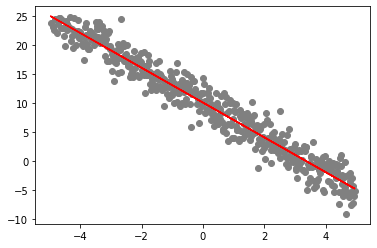

In [84]:
plt.scatter(x, y, color='gray')
plt.plot(x, y_pred, color='red')

plt.show()

Now we see that it really looks like a linear model and the model really fits the data.